# Popular data science questions

## Introduction

We have been asked to find the best content to write about for company that creates data science content. We would need to find what are poeple most interested in learing in this field. What are the top market skills for data scientists. We will start with exploring Stack Exchange and its data science page. 


### Sumary of results

We can recommend to focus on Deep learning once this is a rapidly growing field.

## Request elaboration

On Data Science Stack Exchange (DSSE) we can post our questions and get an answer on them from forum comunity. There are some criteria for each question:
- the question should be concrete enought to be possible to answer without triggering a long discussion,
- an answer can be voted so that the best answer is always on the top,
- wrong questions may be edited or removed.

In each post there are information such as:
- question asked,
- voted answers (user who asked may also mark any answer as the best which solved his/her problem),
- up to 5 tags for each questions categorizing them,
- suggestions, comments to provided solutions as subposts.

## Data gathering
Now we need to access data on DSSE to do it in an efficient way we can use Stack Exchange Data Explorer (SEDE). It allows us to write SQL queries.
The database has different tables and some of them may be helpful with our analysis e.g. Posts, Users, Tags.

We have decided to retive data from Posts table selecting all questions which were asked in 2019

**SEDE Query**

SELECT \
Id, \
PostTypeId, \
CreationDate, \
Score, \
ViewCount, \
Tags, \
AnswerCount, \
FavoriteCount \
FROM Posts \
WHERE PostTypeId = 1 AND CreationDate LIKE '%2019%' \
ORDER BY CreationDate 

### Data exploration

In [368]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

ds2019 = pd.read_csv('data//Stock_DS.csv', parse_dates=['CreationDate'])

ds2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8559 entries, 0 to 8558
Data columns (total 8 columns):
Id               8559 non-null int64
PostTypeId       8559 non-null int64
CreationDate     8559 non-null datetime64[ns]
Score            8559 non-null int64
ViewCount        8559 non-null int64
Tags             8559 non-null object
AnswerCount      8559 non-null int64
FavoriteCount    1467 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 535.1+ KB


## Data cleaning
It looks like there are some null values in FavorieCount column. Lets inspect this column.

In [369]:
ds2019

,Id,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,43363,1,2019-01-01 03:53:02,0,29,<machine-learning><nlp>,1,NaN
1,43366,1,2019-01-01 06:02:07,2,50,<deep-learning><convnet><image-classification>,1,1.0
2,43367,1,2019-01-01 06:16:26,0,21,<scikit-learn><tensorflow><scipy>,1,NaN
3,43370,1,2019-01-01 10:06:03,2,35,<classification>,0,NaN
4,43374,1,2019-01-01 13:18:02,4,31,<deep-learning><time-series><cnn><convolution>,1,NaN
...,...,...,...,...,...,...,...,...
8554,65663,1,2019-12-31 13:25:01,3,43,<information-retrieval>,1,NaN
8555,65664,1,2019-12-31 14:15:54,1,206,<neural-network><deep-learning><classification...,0,NaN
8556,65666,1,2019-12-31 14:59:18,1,52,<scikit-learn><cross-validation><ml>,1,NaN
8557,65667,1,2019-12-31 16:08:06,1,26,<bayesian>,0,NaN


In [370]:
ds2019['FavoriteCount'].unique()

array([nan,  1.,  2.,  5.,  4.,  0.,  3.,  6.,  7., 16.,  9.,  8., 12.])

After inspecting values and reading more about this column we came to the conculsion that NaN values mean 0. So we can replace them with 0 and change the column data type to integer. The rest column's types look fine.

In [371]:
ds2019['FavoriteCount'] = (ds2019['FavoriteCount'].fillna(0)).astype(int)

The last think we need to modify is Tags column we want our values to be easier to parse so lets separate them by comma.

In [372]:
ds2019['Tags'] = ds2019['Tags'].str.extract(r'<(.*)>')
ds2019['Tags'] = ds2019['Tags'].str.replace('><',',')
ds2019['Tags']

0                                    machine-learning,nlp
1              deep-learning,convnet,image-classification
2                           scikit-learn,tensorflow,scipy
3                                          classification
4               deep-learning,time-series,cnn,convolution
                              ...                        
8554                                information-retrieval
8555    neural-network,deep-learning,classification,ke...
8556                     scikit-learn,cross-validation,ml
8557                                             bayesian
8558    deep-learning,hyperparameter,hyperparameter-tu...
Name: Tags, Length: 8559, dtype: object

## Data analysis

Lets start by counting how many times each tag was used

In [373]:
split_tags = ds2019['Tags'].str.split(',',expand=True)

In [374]:
split_tags

,0,1,2,3,4
0,machine-learning,nlp,None,None,None
1,deep-learning,convnet,image-classification,None,None
2,scikit-learn,tensorflow,scipy,None,None
3,classification,None,None,None,None
4,deep-learning,time-series,cnn,convolution,None
...,...,...,...,...,...
8554,information-retrieval,None,None,None,None
8555,neural-network,deep-learning,classification,keras,ensemble-learning
8556,scikit-learn,cross-validation,ml,None,None
8557,bayesian,None,None,None,None


In [375]:
ds2019_tags = ds2019.drop(columns=['Tags','PostTypeId']).copy()
columns = ds2019_tags.columns

In [376]:
for tag_no in split_tags.columns:
    ds2019_tags['Tag_{}'.format(tag_no)] = split_tags[tag_no]

In [377]:
ds2019_tags

,Id,CreationDate,Score,ViewCount,AnswerCount,FavoriteCount,Tag_0,Tag_1,Tag_2,Tag_3,Tag_4
0,43363,2019-01-01 03:53:02,0,29,1,0,machine-learning,nlp,None,None,None
1,43366,2019-01-01 06:02:07,2,50,1,1,deep-learning,convnet,image-classification,None,None
2,43367,2019-01-01 06:16:26,0,21,1,0,scikit-learn,tensorflow,scipy,None,None
3,43370,2019-01-01 10:06:03,2,35,0,0,classification,None,None,None,None
4,43374,2019-01-01 13:18:02,4,31,1,0,deep-learning,time-series,cnn,convolution,None
...,...,...,...,...,...,...,...,...,...,...,...
8554,65663,2019-12-31 13:25:01,3,43,1,0,information-retrieval,None,None,None,None
8555,65664,2019-12-31 14:15:54,1,206,0,0,neural-network,deep-learning,classification,keras,ensemble-learning
8556,65666,2019-12-31 14:59:18,1,52,1,0,scikit-learn,cross-validation,ml,None,None
8557,65667,2019-12-31 16:08:06,1,26,0,0,bayesian,None,None,None,None


In [378]:
ds2019_melt = ds2019_tags.melt(id_vars=columns,value_vars=['Tag_0','Tag_1','Tag_2','Tag_3','Tag_4'])

In [379]:
ds2019_melt

,Id,CreationDate,Score,ViewCount,AnswerCount,FavoriteCount,variable,value
0,43363,2019-01-01 03:53:02,0,29,1,0,Tag_0,machine-learning
1,43366,2019-01-01 06:02:07,2,50,1,1,Tag_0,deep-learning
2,43367,2019-01-01 06:16:26,0,21,1,0,Tag_0,scikit-learn
3,43370,2019-01-01 10:06:03,2,35,0,0,Tag_0,classification
4,43374,2019-01-01 13:18:02,4,31,1,0,Tag_0,deep-learning
...,...,...,...,...,...,...,...,...
42790,65663,2019-12-31 13:25:01,3,43,1,0,Tag_4,None
42791,65664,2019-12-31 14:15:54,1,206,0,0,Tag_4,ensemble-learning
42792,65666,2019-12-31 14:59:18,1,52,1,0,Tag_4,None
42793,65667,2019-12-31 16:08:06,1,26,0,0,Tag_4,None


In [380]:
tag_used = ds2019_melt['value'].value_counts()
tag_used.head(10)

machine-learning    2621
python              1764
deep-learning       1172
neural-network      1032
keras                910
classification       665
tensorflow           567
scikit-learn         525
nlp                  480
cnn                  474
Name: value, dtype: int64

Above we can see top 10 used tags. Which indicated what type of questions were asked - related to which topic (tag). Lets now explore how many times each tag was seen by users.

In [381]:
# To do this we need to group our records by tag and sum viewcounts
tag_viewed = ds2019_melt.groupby('value')['ViewCount'].agg('sum').sort_values(ascending=False)
tag_viewed.head(10)

value
python              790446
machine-learning    535765
keras               373589
pandas              327567
deep-learning       318474
neural-network      257698
scikit-learn        183732
tensorflow          174956
classification      142198
dataframe           133660
Name: ViewCount, dtype: int64

### Visualization of top Tags

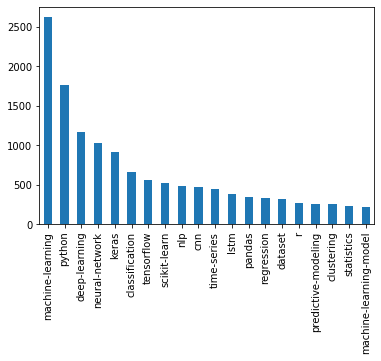

In [382]:
tag_used.head(20).plot(kind='bar')

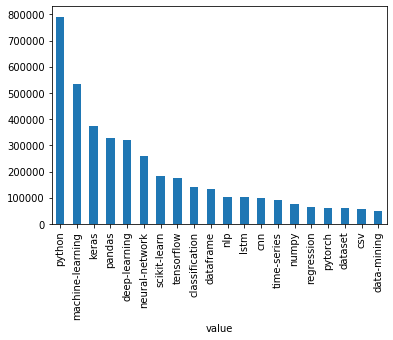

In [383]:
tag_viewed.head(20).plot(kind='bar')

Lets find intersaction of both.

In [384]:
def intersection(lst1, lst2): 
    return set(lst1).intersection(lst2) 
intersection(tag_used.head(20).index.tolist(),tag_viewed.head(20).index.tolist())

{'classification',
 'cnn',
 'dataset',
 'deep-learning',
 'keras',
 'lstm',
 'machine-learning',
 'neural-network',
 'nlp',
 'pandas',
 'python',
 'regression',
 'scikit-learn',
 'tensorflow',
 'time-series'}

Using our domain knowledge we can see that all of them are related to each other and all can be clisified as Machine learning techniques. Once we checked only 2019 lets now investigate how it is changing through time. Lets fetch all questions asked on DSSE. We run below query:

SELECT \
Id, \
CreationDate, \
Tags \
FROM posts \
WHERE PostTypeId = 1;



In [385]:
# reading a new dataset
all_questions = pd.read_csv('data//all_questions_DS.csv',parse_dates=['CreationDate'])

In [386]:
all_questions

,Id,CreationDate,Tags
0,28799,2018-03-08 12:42:35,<machine-learning><classification><xgboost><pr...
1,28800,2018-03-08 12:46:31,<decision-trees><probability><transfer-learning>
2,28805,2018-03-08 15:54:47,<machine-learning><neural-network><deep-learni...
3,28809,2018-03-08 16:44:45,<recommender-system><pca>
4,28810,2018-03-08 16:49:07,<linear-regression><loss-function>
...,...,...,...
22763,8941,2015-11-20 11:21:03,<community>
22764,8943,2015-11-20 14:15:37,<predictive-modeling><time-series>
22765,8946,2015-11-20 20:52:08,<data-cleaning><gradient-descent><linear-regre...
22766,8961,2015-11-21 07:17:14,<statistics><correlation><linear-regression>


### Data transformation

In [387]:
# Transforming tag column
all_questions['Tags'] = all_questions['Tags'].str.replace('><',',').str.replace(r'[<>]','')
all_questions_tags = all_questions['Tags'].str.split(',')

In [388]:
all_questions.sort_values(by='CreationDate')

,Id,CreationDate,Tags
129,5,2014-05-13 23:58:30,machine-learning
130,7,2014-05-14 00:11:06,"education,open-source"
131,14,2014-05-14 01:25:59,"data-mining,definitions"
132,15,2014-05-14 01:41:23,databases
133,16,2014-05-14 01:57:56,"machine-learning,bigdata,libsvm"
...,...,...,...
22092,70046,2020-03-21 20:37:19,"machine-learning,scikit-learn,time-series,visu..."
22093,70047,2020-03-21 20:49:31,"python,preprocessing,dimensionality-reduction"
22094,70048,2020-03-21 20:59:48,"python,scikit-learn,data-mining,predictive-mod..."
22095,70050,2020-03-21 22:49:31,"neural-network,keras,training,loss-function"


### Using domain knowlege
Lets gather deep learning technics and tools to be able to categorize any other tags which may be related to deep learning.

In [389]:
deep_learning_synonym = """Unsupervised Pre-trained Networks, Convolutional Neural Networks, 
Recurrent Neural Networks, Recursive Neural Networks, Deep Reinforcement Learning,
Back-Propagation,Stochastic Gradient Descent,Learning Rate Decay,
Dropout,Max Pooling,Batch Normalization,Long Short-Term Memory,deep learning,
Skip-gram,Continuous Bag Of Words,Transfer Learning, neural network,
Neural Designer, Torch, Apache SINGA, Microsoft Cognitive Toolkit, Keras,
Deeplearning4j, Theano, MXNet, H2O.ai, ConvNetJS, DeepLearningKit, Gensim, Caffe, ND4J"""

In [390]:
deep_word = []
for word in deep_learning_synonym.split(','):
    deep_word.append(word.strip().lower().replace('\n','').replace(' ','-'))

In [391]:
tag_deep = []
for index, row in all_questions.iterrows():
    tags = row['Tags'].split(',')
    for tag in tags:
        if tag in deep_word:
            tag_deep.append(tag)

In [392]:
deep_tags= pd.Series(tag_deep).unique().tolist()

Lets categorize all above tags as deep learning

In [393]:
all_questions['Year'] = (all_questions['CreationDate'].dt.year).astype(str) + '/' + (all_questions['CreationDate'].dt.quarter).astype(str)

In [394]:
def deep_cat(val):
    for tag in val.split(','):
        if tag in deep_tags:
            return 1
        else:
            return 0
all_questions['deep_learning'] = all_questions['Tags'].apply(deep_cat)

In [395]:
all_questions['deep_learning'].value_counts()[1]

3136

### Data aggregation

In [396]:
deep_questions = all_questions.groupby('Year').sum()['deep_learning']

In [397]:
deep_questions_cum = all_questions.groupby('Year').sum()['deep_learning'].cumsum()

In [398]:
total_questions = all_questions.groupby('Year').agg('size')

### Data vizualization

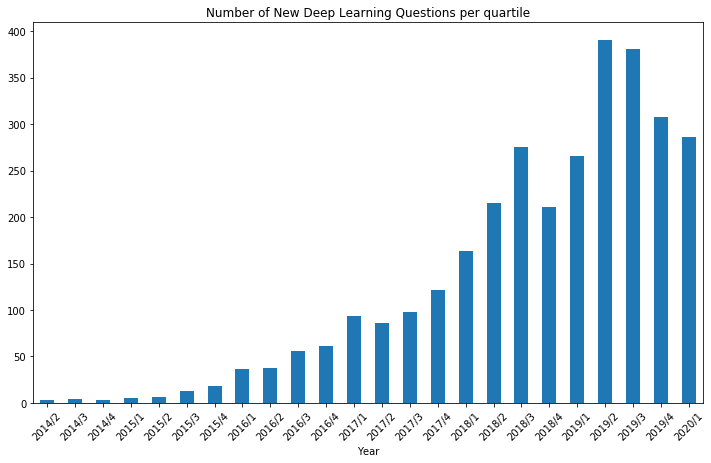

In [399]:
deep_questions.plot(kind='bar',rot='45',figsize= (12,7),title='Number of New Deep Learning Questions per quartile')

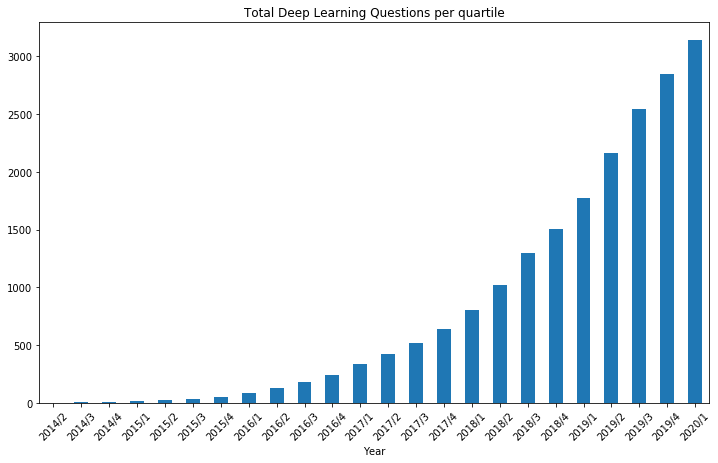

In [400]:
deep_questions_cum.plot(kind='bar',rot='45',figsize= (12,7),title='Total Deep Learning Questions per quartile')

### Deep learning questions as part of total questions

In [402]:
total_min_deep = total_questions.cumsum() -deep_questions_cum
total_min_deep.rename('total_questions',inplace=True)

Year
2014/2      154
2014/3      339
2014/4      552
2015/1      737
2015/2     1015
2015/3     1313
2015/4     1677
2016/1     2157
2016/2     2636
2016/3     3164
2016/4     3630
2017/1     4233
2017/2     4792
2017/3     5406
2017/4     6180
2018/1     7236
2018/2     8466
2018/3     9676
2018/4    10757
2019/1    12262
2019/2    14254
2019/3    16255
2019/4    17971
2020/1    19632
Name: total_questions, dtype: int64

In [403]:
total_deep = pd.merge(left=pd.DataFrame(total_min_deep),right=pd.DataFrame(deep_questions_cum), how='inner',left_index=True,right_index=True)

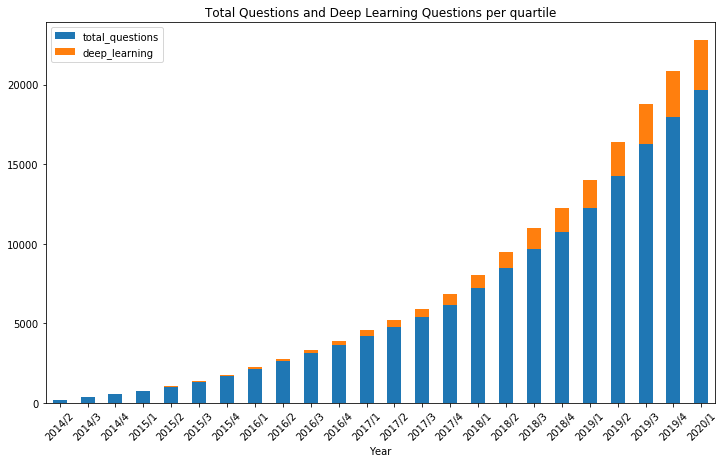

In [404]:
total_deep.plot(kind='bar', stacked=True,rot='45',figsize= (12,7),title='Total Questions and Deep Learning Questions per quartile')

## Conclusion

As we can see a number of deep learning related questions is continously growing, it also grows as being bigger part of total asked questions.

Here are some things to consider:

What other content can we recommend that isn't as popular? You can try using association rules to find strong relations between tags.
What other popularity features could we include in our analysis? Perhaps scores and favourite counts?
We focused on other DSSE. How could we use other related sites to help us with our goal?
How can we leverage other sites to determine what non-data-science content to write about? For example, is there some mathematical field that leads to more questions than others?